Importar Librerías

In [1]:
# Importar las librerías necesarias.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None




Matplotlib is building the font cache; this may take a moment.


In [4]:
#Cargar los datos

df=pd.read_csv(r'C:\Users\Osvaldo\Downloads\movies.csv')

#Ver las primeras columnas para entender el contenido de la tabla.
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# Verificar si hay datos faltantes y qué porcentaje del total representan.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [13]:
#  Dejar de lado los registros con valores nulos.
df = df.dropna()

#Verificar que ya no hay valores nulos.
np.sum(df.isnull())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [17]:
# Ver con qué tipos de datos estamos trabajando.
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [22]:
#Transformar el tipo de dato de las columnas budget y gross, de float64 a int64.

df = df.astype({"budget":"int64","gross":"int64"})
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [33]:
#Películas ordenadas según ganancia (gross) de mayor a menor.
df.sort_values(by=['gross'], ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


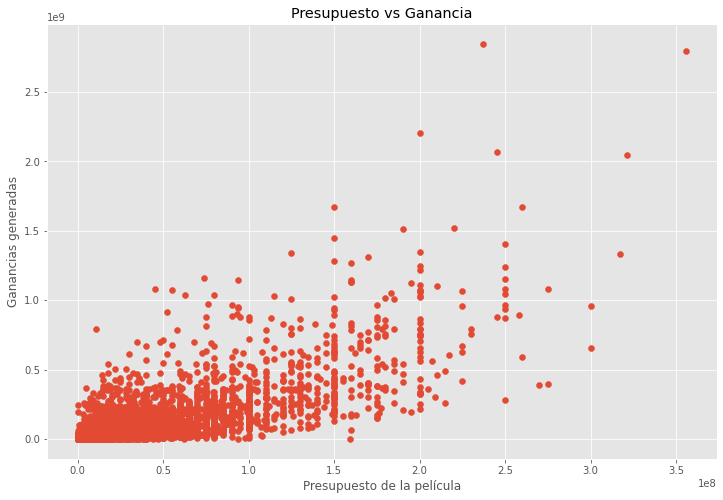

In [38]:
# El dataset tiene datos limpios, por lo cual es apropiado para iniciar las tareas de análisis.
# Se investiga inicialmente la correlación existente entre presupuesto y ganancia de la película (budget y gross en el dataset)
# Se realiza un diagrama de dispersión de las dos variables.

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Presupuesto vs Ganancia')
plt.xlabel('Presupuesto de la película')
plt.ylabel('Ganancias generadas')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

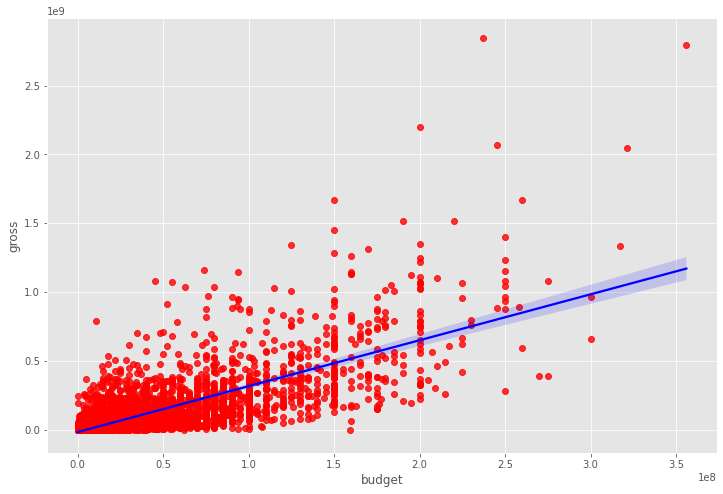

In [39]:
# Se realiza otro diagrama de dispersión entre las mismas variables, agregando la recta de regresión lineal.
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [40]:
# La correlación entre estas variables puede analizarse con mayor profundidad, pero a priori puede 
# afirmarse que es directa o positiva.
# Otro recurso para analizar correlaciones entre variables númericas:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [41]:
#El coeficiente de correlación entre las variables presupuesto y ganancia arroja un valor de 0,74, lo cual es una correlación
# sumamente significativa siendo que un valor de 1 representa la asociación total entre las variables.



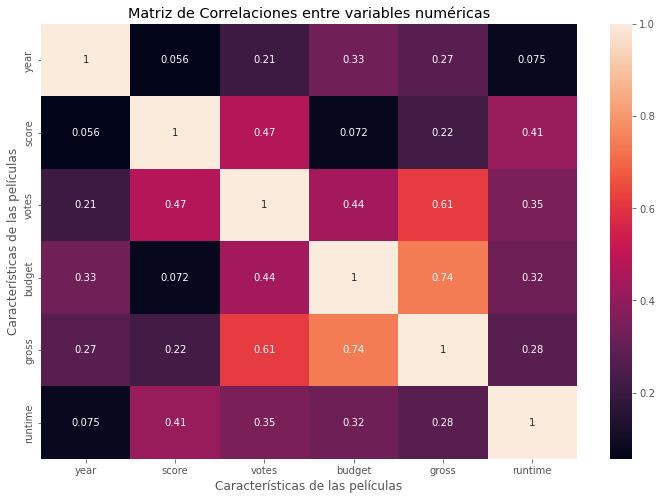

In [45]:
#Se visualizan las correlaciones registradas para una mejor comprensión.
correlation_matrix= df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlaciones entre variables numéricas')
plt.xlabel('Características de las películas')
plt.ylabel('Características de las películas')
plt.show()

# Análisis de correlaciones.
Como se aprecia en la matriz de correlaciones, existe una fuerte asociación entre la cantidad de dinero invertido en las películas y los retornos/ganancias obtenidos. Más allá de casos de películas puntuales puede entonces afirmarse que las grandes producciones atraen una mayor cantidad de público, mientras que las de bajo presupuesto tendrán una recaudación inferior en comparación.

IMDB es la base de datos cinematográfica más grande del mundo, por lo cual reúne las críticas y puntuaciones de una gran 
cantidad de usuarios de alrededor de todo el mundo. Considerando esto, pueden tomarse los ratings de las películas en este sitio como una representación fidedigna de la calidad cinematográfica de los títulos.
Es por eso que sorprende que el coeficiente de correlación entre las variables score y gross (puntaje y ganancia) sea de tan solo 0,22. Tal vez el sentido común haría pensar que las películas mejor valoradas por el público son las que mayores cantidades de público asistente y ganancias generan, pero esto no es así. La baja correlación implica que, muy a pesar de los cinéfilos, a las productoras les es más redituable limitarse a invertir en tanques cinematográficos de gran presupuesto (los llamados blockbusters) en vez de ocuparse de producir películas que sean valoradas positivamente por el público.

Otra de las correlaciones más bajas (0,072) es la que existe entre los puntajes de las películas y su presupuesto.
Esto significa que hay una proporción similar de películas "buenas" y de películas "malas" entre las producciones de presupuesto alto, medio y bajo. En otras palabras, no hay necesidad de ser prejuiciosos ni con los tanques hollywoodenses ni con las producciones independientes de bajo presupuesto, ya que en ambos casos la probabilidad de que la película sea valorada negativamente es similar.

Lo que sí puede servir como un indicio de la calidad de la película puede ser su duración: la correlación entre las variables
runtime y score es de 0,41, lo cual se traduce en que existe una tendencia a que cuanto mayor sea la duración de la película 
mayor es la probabilidad de que sea valorada positivamente por el espectador.

Por último, la variable "votes" (es decir, la cantidad de votaciones que recibió cada película en el sitio de IMDB) se correlaciona positivamente de forma significativa con numerosas variables: Puntajes, presupuesto y ganancias.
Tiene sentido que cuanto mejor valorada sea una película más votos reciba, ya que se crea un círculo que se retroalimenta, por el cual las personas escogen ver las películas con puntaje más alto y por lo tanto luego acaban votándolas ellas mismas.

Asimismo, las películas que más ganancia generan suelen ser las que han sido vistas por una mayor cantidad de personas, por lo cual es lógico que en general esto va a traer aparejada una mayor cantidad de calificaciones en IMDB, registradas por las millones de personas que han asistido a la película.
